### Search Tree -> Similar Words

    读入csv -> 去空 -> 取内容 ->切词 -> 存入文件 -> 词向量直接读取文件（可以不用度内存）

In [1]:
csv_path = 'F:/Jupyter/NLP/Artificial-Intelligence-NLP/Project1/sqlResult_1558435.csv'

In [2]:
import pandas as pd

In [3]:
content = pd.read_csv(csv_path)
# pd.read_csv(csv_path, encoding='gb18030')

In [5]:
content = content.fillna('')

In [6]:
news_content = content['content'].tolist()

In [7]:
import jieba

In [8]:
def cut(string): return ' '.join(jieba.cut(string))

In [9]:
cut("这是一个测试")

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\cassi\AppData\Local\Temp\jieba.cache
Loading model cost 0.762 seconds.
Prefix dict has been built succesfully.


'这是 一个 测试'

In [10]:
import re

In [13]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [14]:
token('这是一个测试\n\n\n')

['这是一个测试']

In [15]:
news_content = [token(n) for n in news_content]

In [16]:
news_content = [' '.join(n) for n in news_content]

In [17]:
news_content = [cut(n) for n in news_content]

In [19]:
news_content[1]

'骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台'

In [20]:
with open('news-sentences-cut.txt','w') as f:
    for n in news_content:
        f.write(n+'\n')

In [22]:
from gensim.models import Word2Vec

In [23]:
from gensim.models.word2vec import LineSentence

In [25]:
news_word2vec = Word2Vec(LineSentence(open('news-sentences-cut.txt',encoding='gb18030')),size=35, workers=8)

## More Date, Better Results
   1. 分词问题
   2. **数据量**，数据越多，效果越好，维基百科加进来，同义词会越多
   
       + 葡萄牙 --> 意大利， 摩洛哥，捷克， ...
       + 意大利 --> 葡萄牙，西班牙，比利时，捷克，...
       + 捷克 --> 罗马尼亚，拉脱维亚，丹麦, ...
       + 在这个搜索树里，单词出现频次越多，就和原有单词的意思越接近

In [31]:
news_word2vec.most_similar("葡萄牙", topn=20)

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('克罗地亚', 0.8373079299926758),
 ('意大利', 0.8325285315513611),
 ('捷克', 0.8262540102005005),
 ('摩洛哥', 0.8161495923995972),
 ('伊斯坦布尔', 0.795128583908081),
 ('比利时', 0.7951174378395081),
 ('巴塞罗那', 0.7915026545524597),
 ('索', 0.7912424802780151),
 ('科特迪瓦', 0.790550947189331),
 ('乌拉圭', 0.7860150337219238),
 ('苏格兰', 0.7854756712913513),
 ('多哈', 0.784430205821991),
 ('拉脱维亚', 0.7803289890289307),
 ('西班牙', 0.7803261280059814),
 ('罗马', 0.7796105742454529),
 ('瑞典', 0.7786960601806641),
 ('奥地利', 0.777396559715271),
 ('瑞士', 0.7746898531913757),
 ('里斯本', 0.7738996744155884),
 ('巴拉圭', 0.7699601054191589)]

In [34]:
news_word2vec.most_similar("说",topn=30)

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('表示', 0.9052091836929321),
 ('认为', 0.8648311495780945),
 ('指出', 0.8448109030723572),
 ('看来', 0.8217576146125793),
 ('坦言', 0.7967931628227234),
 ('告诉', 0.7859079241752625),
 ('介绍', 0.7813185453414917),
 ('透露', 0.7568737268447876),
 ('明说', 0.7513105273246765),
 ('称', 0.7419908046722412),
 ('文说', 0.7350116968154907),
 ('所说', 0.6837072968482971),
 ('强调', 0.6814193725585938),
 ('中说', 0.6787333488464355),
 ('建议', 0.6505147814750671),
 ('时说', 0.6437146663665771),
 ('称赞', 0.6433064937591553),
 ('深有体会', 0.6229017972946167),
 ('道', 0.6190448999404907),
 ('嚷嚷', 0.6163432002067566),
 ('纳说', 0.5983268618583679),
 ('提到', 0.5982838869094849),
 ('相信', 0.59534752368927),
 ('地说', 0.5876277685165405),
 ('问', 0.586228609085083),
 ('高佑思', 0.5843443274497986),
 ('的话', 0.5804107785224915),
 ('说道', 0.5789715051651001),
 ('资深', 0.5689646601676941),
 ('普遍认为', 0.5570757389068604)]

In [35]:
news_word2vec.most_similar("认为",topn=30)

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('指出', 0.9172672629356384),
 ('表示', 0.8929559588432312),
 ('说', 0.8648312091827393),
 ('看来', 0.8451336622238159),
 ('坦言', 0.7854670286178589),
 ('称', 0.777629017829895),
 ('普遍认为', 0.7756994962692261),
 ('建议', 0.7553712129592896),
 ('强调', 0.7261189818382263),
 ('透露', 0.7194098234176636),
 ('表明', 0.6959291696548462),
 ('相信', 0.6606128811836243),
 ('所说', 0.6563802361488342),
 ('告诉', 0.6449812650680542),
 ('介绍', 0.6422977447509766),
 ('嚷嚷', 0.6381882429122925),
 ('对此', 0.6340894103050232),
 ('事实上', 0.6288219690322876),
 ('不明智', 0.6257817149162292),
 ('看法', 0.6232337951660156),
 ('声称', 0.6223520040512085),
 ('呼吁', 0.6200030446052551),
 ('看好', 0.6173399686813354),
 ('及其', 0.6153714656829834),
 ('孤例', 0.6106504797935486),
 ('分析', 0.6073032021522522),
 ('质疑', 0.6064683198928833),
 ('而言', 0.6044669151306152),
 ('资深', 0.6012047529220581),
 ('观点', 0.5981201529502869)]

In [36]:
news_word2vec.most_similar("建议",topn=10)

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('指出', 0.7623947858810425),
 ('认为', 0.75537109375),
 ('强调', 0.7332313060760498),
 ('表示', 0.7176448702812195),
 ('要求', 0.7133300304412842),
 ('必要', 0.6717209219932556),
 ('此外', 0.6535590887069702),
 ('评价', 0.6517869234085083),
 ('说', 0.6505147814750671),
 ('提醒', 0.6457076072692871)]

In [37]:
from collections import defaultdict

In [71]:
def get_related_words(initial_words, model):
    '''
    @initial_words are initial words we already know
    @model is the word2vec model
    '''
    unseen = initial_words
    seen = defaultdict(int)
    max_size = 300  # could be greater
    while unseen and len(seen) < max_size:
        if len(seen) % 50 ==0:
            print('seen length:{}'.format(len(seen)))
        node = unseen.pop(0)
        new_expanding = [w for w,s in model.most_similar(node, topn=30)] # 这个topn取值需合理，
                                    #  很大不行会得到很多边界的取值，越大越会有不合理的词，很小也不行，限制了搜索空间
        unseen += new_expanding
        seen[node] += 1
        # 优化方法： 必有重复词出现，可以用动态规划，子问题有重复，减少搜索空间；
        #            赋值函数优化，可以用别的方法计数
    return seen

In [72]:
related_words = get_related_words(['说','表示'],news_word2vec)

seen length:0


D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  del sys.path[0]


seen length:50
seen length:50
seen length:100
seen length:150
seen length:150
seen length:200
seen length:250


In [73]:
sorted(related_words.items(), key=lambda x: x[1], reverse=True) # 100

[('说', 18),
 ('表示', 15),
 ('指出', 14),
 ('看来', 14),
 ('认为', 12),
 ('坦言', 12),
 ('透露', 12),
 ('介绍', 10),
 ('明说', 10),
 ('称', 10),
 ('所说', 10),
 ('提到', 10),
 ('文说', 9),
 ('告诉', 8),
 ('嚷嚷', 8),
 ('普遍认为', 8),
 ('中说', 7),
 ('建议', 7),
 ('相信', 7),
 ('资深', 7),
 ('中称', 7),
 ('强调', 6),
 ('说道', 6),
 ('呼吁', 6),
 ('声称', 6),
 ('称赞', 5),
 ('深有体会', 5),
 ('地说', 5),
 ('对此', 5),
 ('时说', 4),
 ('问', 4),
 ('接受', 4),
 ('提及', 4),
 ('敦促', 4),
 ('分析', 4),
 ('直言', 4),
 ('高佑思', 3),
 ('的话', 3),
 ('重申', 3),
 ('表明', 3),
 ('形容', 3),
 ('谈到', 3),
 ('感慨', 3),
 ('解释', 3),
 ('证实', 3),
 ('写道', 3),
 ('还称', 3),
 ('时称', 3),
 ('深表', 2),
 ('事实上', 2),
 ('不明智', 2),
 ('看法', 2),
 ('及其', 2),
 ('质疑', 2),
 ('而言', 2),
 ('观点', 2),
 ('提出', 2),
 ('特别强调', 2),
 ('评价', 2),
 ('眼中', 2),
 ('觉得', 2),
 ('写信给', 2),
 ('回答', 2),
 ('供图', 2),
 ('副', 2),
 ('咨询', 2),
 ('部副', 2),
 ('常务', 2),
 ('知情', 2),
 ('具名', 2),
 ('承认', 2),
 ('宣称', 2),
 ('连生', 2),
 ('刘', 2),
 ('郭', 2),
 ('八面玲珑', 2),
 ('海涛', 2),
 ('农办', 2),
 ('一峰', 2),
 ('魏', 2),
 ('说法', 2),
 ('评述', 2),

In [57]:
sorted(related_words.items(), key=lambda x: x[1], reverse=True) # 1000

[('认为', 87),
 ('指出', 84),
 ('表示', 83),
 ('说', 77),
 ('看来', 77),
 ('透露', 73),
 ('坦言', 68),
 ('称', 57),
 ('所说', 55),
 ('提到', 53),
 ('介绍', 50),
 ('嚷嚷', 47),
 ('普遍认为', 46),
 ('明说', 43),
 ('建议', 43),
 ('告诉', 40),
 ('资深', 40),
 ('声称', 39),
 ('文说', 38),
 ('强调', 38),
 ('中称', 37),
 ('中说', 36),
 ('相信', 33),
 ('质疑', 33),
 ('说道', 31),
 ('提及', 30),
 ('呼吁', 29),
 ('对此', 28),
 ('深有体会', 27),
 ('称赞', 26),
 ('问', 26),
 ('表明', 26),
 ('地说', 24),
 ('解释', 24),
 ('还称', 24),
 ('批评', 24),
 ('事实上', 23),
 ('看法', 23),
 ('谈到', 23),
 ('特别强调', 22),
 ('承认', 22),
 ('重申', 21),
 ('分析', 21),
 ('直言', 21),
 ('写道', 21),
 ('敦促', 19),
 ('觉得', 18),
 ('证实', 18),
 ('时称', 18),
 ('时说', 17),
 ('的话', 17),
 ('不明智', 17),
 ('宣称', 17),
 ('反驳', 17),
 ('观点', 16),
 ('回答', 16),
 ('形容', 15),
 ('感慨', 15),
 ('知情', 15),
 ('主张', 15),
 ('接受', 14),
 ('具名', 14),
 ('回应', 14),
 ('请问', 14),
 ('希望', 14),
 ('说明', 14),
 ('指责', 14),
 ('高佑思', 13),
 ('不过', 13),
 ('坚称', 13),
 ('引用', 13),
 ('阐述', 13),
 ('做法', 13),
 ('而言', 12),
 ('列举', 12),
 ('给出', 12),
 ('确信'

### Keyword Extraction
* 计算 TF-IDF
* TF-IDF 向量
* 可视化- 词云

### TF-IDF Key words

   $$idf_t = log \frac{N(文章个数)}{df_t(包含了这个单词的文章个数)}$$
                  

In [76]:
# 这个单词在多少个文本中出现过
def document_frequency(word):
    return sum(1 for n in news_content if word in n)

In [77]:
document_frequency('的')

70342

In [78]:
document_frequency('关于')

3376

In [79]:
import math

In [80]:
def idf(word): 
    """get the inversed document frequency"""
    return math.log10(len(news_content) / document_frequency(word))

In [81]:
idf('的') < idf('小米')

True

In [82]:
def tf(word, document):    # tf: word在文章document中出现的次数
    """
    get the term frequency of a @word in a @document
    """
    words = document.split()
    return sum(1 for w in words if w == word)

In [83]:
tf('银行', news_content[11])

6

In [84]:
idf('银行')

1.4550169427748936

In [87]:
def get_keywords_of_a_document(document):
    words = set(document.split())
    tfidf = [
        (w, tf(w,document)* idf(w)) for w in words
    ]
    tfidf = sorted(tfidf,  key=lambda x: x[1], reverse=True)
    return tfidf

In [88]:
get_keywords_of_a_document(news_content[0])

[('MIUI', 13.953993984385477),
 ('机型', 5.854110917055407),
 ('系统优化', 4.9523613237924735),
 ('稳定版', 4.9523613237924735),
 ('体验版', 4.9523613237924735),
 ('暂不受', 4.9523613237924735),
 ('精力', 4.865066660033509),
 ('内测', 4.17421007340883),
 ('官方消息', 3.9523613237924735),
 ('距今已有', 3.6301420290585544),
 ('更新换代', 3.433847383914586),
 ('用到', 3.339577467072738),
 ('确切', 3.139447967149618),
 ('有余', 3.0128420711738553),
 ('小米', 2.948039950009831),
 ('猜测', 2.6828483795745575),
 ('本周', 2.3069390544433817),
 ('其余', 2.2953054709353697),
 ('工程师', 2.2595144045152438),
 ('更新', 2.2143739974590426),
 ('暂停', 2.188933330229536),
 ('发布', 2.15877938610806),
 ('之中', 2.129539678489369),
 ('当然', 2.040139267260058),
 ('等待', 2.0327603000083627),
 ('有人', 1.7504182603908234),
 ('研发', 1.7322532357524185),
 ('手机', 1.7180971994136842),
 ('确保', 1.6071837072497697),
 ('含', 1.5902560044987006),
 ('集中', 1.558260021752429),
 ('时候', 1.5056688574209465),
 ('版', 1.4878717763585023),
 ('开发', 1.428354878235101),
 ('关于', 1.4239588

In [89]:
get_keywords_of_a_document(news_content[11])

[('市场', 21.353584391728972),
 ('股指', 18.198034968575843),
 ('周四', 17.26088617439966),
 ('均线', 15.505514875366993),
 ('板块', 15.184208429020511),
 ('创业板', 15.040542723113257),
 ('沪', 14.096891190311872),
 ('反弹', 11.40131732928378),
 ('巨丰', 11.244724023409647),
 ('普涨', 11.1657372072426),
 ('居前', 10.78835527475667),
 ('午后', 10.712813898115176),
 ('早盘', 10.614032989531069),
 ('大盘', 10.528860150725679),
 ('保险', 9.712428450401568),
 ('跳水', 9.392541082832015),
 ('具备', 9.384071811999714),
 ('局部性', 8.950480138145622),
 ('走势', 8.886316192504337),
 ('回落', 8.85749598983617),
 ('银行', 8.730101656649362),
 ('大涨', 8.113164172292002),
 ('涨幅', 7.982850978349081),
 ('阴线', 7.904722647584947),
 ('普跌', 7.676835942971274),
 ('上影线', 7.552540129473584),
 ('半年线', 7.552540129473584),
 ('题材', 7.529644664184074),
 ('个股', 7.317431171173604),
 ('伏击', 7.0747759516433115),
 ('探底', 7.010406584900509),
 ('行情', 6.978062869252294),
 ('兴业银行', 6.560526931713512),
 ('沪市', 6.52433048752792),
 ('复星', 6.472715960315349),
 ('白马股'

In [91]:
%prun get_keywords_of_a_document(news_content[0])  # 观察哪个函数用时比较慢

## wordCloud
    加载字体支持中文 -> 获得keywords的字典(key - score)不能为list -> 生成词云

In [92]:
import wordcloud

In [93]:
wc = wordcloud.WordCloud('F:/Jupyter/NLP/Artificial-Intelligence-NLP/Week6/SourceHanSerifSC-Regular.otf')

In [98]:
keywords_dict = get_keywords_of_a_document(news_content[0])

In [100]:
machine_key_words = {w:score for w,score in keywords_dict}

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

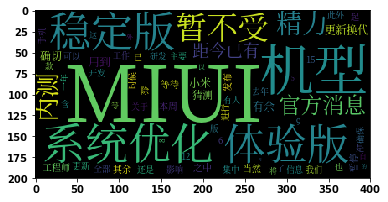

In [104]:
plt.imshow(wc.generate_from_frequencies(machine_key_words))

In [105]:
shenzhen_social_news = get_keywords_of_a_document(news_content[4])

In [106]:
from PIL import Image

In [107]:
import numpy as np

In [123]:
girl_mask = np.array(Image.open('F:/Jupyter/NLP/Artificial-Intelligence-NLP/Week6/timg.jpg'))

In [126]:
word_cloud_withmask = wordcloud.WordCloud(
    background_color="white",
    font_path = 'F:/Jupyter/NLP/Artificial-Intelligence-NLP/Week6/SourceHanSerifSC-Regular.otf',
    mask = girl_mask,
)

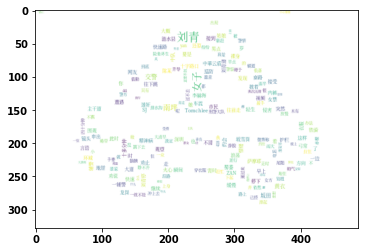

In [127]:
plt.imshow(word_cloud_withmask.generate_from_frequencies({w:s for w,s in shenzhen_social_news}), interpolation='bilinear')
# plt.axis("off")
# plt.figure()
# plt.imshow(girl_mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.axis("off")
# plt.show()

## TFIDF Vectorized - 文本中的使用
    tfidf向量化，能做一些相似度计算

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [130]:
vectorized = TfidfVectorizer(max_features=10000)

In [131]:
sample_num = 50000
sub_samples = news_content[:sample_num]

In [132]:
X= vectorized.fit_transform(sub_samples)

In [133]:
X.shape

(50000, 10000)

In [155]:
len(vectorized.vocabulary_)

10000

In [160]:
vectorized.vocabulary_

{'此外': 6195,
 '本周': 5892,
 '12': 35,
 '小米': 3974,
 '手机': 4878,
 '15': 46,
 '其余': 1844,
 '暂停': 5738,
 '更新': 5760,
 '发布': 2635,
 '开发': 4405,
 '影响': 4525,
 '确保': 7338,
 '工程师': 4132,
 '可以': 2734,
 '集中': 9631,
 '全部': 1743,
 '精力': 7662,
 '进行': 9141,
 '工作': 4113,
 '有人': 5808,
 '猜测': 6880,
 '主要': 912,
 '研发': 7319,
 '之中': 933,
 '去年': 2558,
 '一年': 302,
 '时候': 5628,
 '当然': 4505,
 '关于': 1819,
 '信息': 1546,
 '我们': 4802,
 '还是': 9082,
 '等待': 7607,
 '作为': 1440,
 '唯一': 2966,
 '通过': 9249,
 '10': 12,
 '平台': 4255,
 '认证': 8554,
 '处理器': 3331,
 '强调': 4481,
 '不会': 551,
 '因为': 3045,
 '考虑': 7980,
 '性能': 4642,
 '核心': 6069,
 '相反': 7212,
 '他们': 1242,
 '联手': 8020,
 '微软': 4579,
 '找到': 4949,
 '一种': 344,
 '适合': 9193,
 '兼顾': 1864,
 '完美': 3783,
 '方案': 5537,
 '报道': 5026,
 '已经': 4156,
 '拿到': 5092,
 '一些': 253,
 '以便': 1259,
 '更好': 5757,
 '理解': 6966,
 '架构': 6022,
 '资料': 8791,
 '显示': 5703,
 '一款': 332,
 '集成': 9638,
 '传统': 1355,
 '节省': 8201,
 '至少': 8132,
 '30': 103,
 '空间': 7498,
 '按计划': 5124,
 '今年': 1217,
 '联想': 8019,
 '首发': 982

In [159]:
np.where(X[0].toarray())  # 去0返回下标

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([  35,   46,  302,  912,  933, 1546, 1743, 1819, 1844, 2558, 2635,
        2734, 3974, 4113, 4132, 4405, 4505, 4525, 4802, 4878, 5628, 5738,
        5760, 5808, 5892, 6195, 6880, 7319, 7338, 7607, 7662, 9082, 9141,
        9631], dtype=int64))

In [154]:
X[0].toarray()[0][35]  #小米的向量

0.10892179942165198

In [136]:
import random

In [137]:
doc_id_1, doc_id_2 = random.randint(0,1000), random.randint(0,1000)

In [138]:
doc_id_1

480

In [139]:
doc_id_2

950

In [140]:
news_content[doc_id_1]

'文 视频   林国振   客户 输入 提货 码 打开 配送 机器人 的 货仓   取走 了 自己 的 包裹   有人 当心 无人 车会 不会 碰到 行人 呢   不用 担心   机器人 宝宝 配送 过程 中   无人 车顶 的 激光 感应 系统 会 自动检测 前方 行人 车辆   靠近 三 米左右 会 自动 停车   遇到 障碍物 会 自动 避障   可攀登 25 度 的 上坡   而且 无人 车有 基本 的 防水 功能   不用 担心 下雨   也 不用 担心 没 电   低电量 时   车子 会 自动 返回   配送 机器人 所 具备 的 高负荷   全天候 工作   智能 等 优点   将 为 物流 行业 的   最后 一 公里   带 去 全新 的 解决方案   无人 配送 车充 一次 电 可以 行驶 80 公里   一天 可 在 园区 内 配送 50 趟   相当于 一位 配送 员 的 工作量   目前 无人 配送 车 的 车速 最快 可达 20 公里   小时   但 考虑 到 路面 复杂程度 一般 设定 在 5 公里 时速   据 现场 人员 了解   除了 中国人民大学 之外   首批 京东 配送 机器人 已经 投入 到 清华大学   浙江大学   长安 大学 等 著名 高校 内 执行 配送 任务   目前   京东 在 全国 设有 1300 个 配送 站点 京东 派   未来 这些 京东 派 的 站点 可能 会 陆续 成为 京东 配送 机器人 的 基地   让 更 多 的 高校 师生 享受 到 京东 机器人 提供 的 配送 服务   京东 无人 车 的 体验 到底 如何 呢   有 了 它 快递 员要 失业 了   送 快递 真的 方便 吗   快 戳 视频 看看 吧'

In [141]:
news_content[doc_id_2]

'15 年前   李泽湘 接受 本报记者 采访 的 时候   他 是 香港科技大学 的 副教授   在 港 科大 有 一间 小小的 办公室   他 担任 董事长 的 固高 公司 创立 刚 3 年   还 在 起步 阶段   15 年 后   重访 港 科大 教授 李泽湘   他 创办 的 机器人 研究所 已经 占 了 一层楼   有人 称 他 为   无人机 教父   横扫 无人机 市场 的 大疆 创新 总裁 汪滔 是 他 的 学生   他 是 大疆 的 董事长   他 依然 坐在 一间 小小的 办公室 里   以 略带 湖南 口音 的 普通话 侃侃而谈   介绍 他 参与 发起 的 香港 科技 创业 平台 暨 青年 创业 服务 系统 HONGKONGX   作为   海归派   中 的 先知先觉者   李泽湘 来到 香港 已经 25 年   这 25 年   他 做 了 很多 事   也 可以 说 只 做 了 一件 事   让 科研成果 走出 校园   走出 实验室   走向 广阔 的 市场   中国 企业 要 发展 自己 的 设备 产业   1992 年   李泽湘 正式 加盟 香港科技大学   创办 数控 研究 实验室 及 自动化 技术 中心 并 担任 主任   此前   他 的 经历 堪称 励志   1979 年   年仅 17 岁 的 中南 矿冶 学院 新生 李泽湘 获选 公派 赴美 留学   接下来 是 一连串 难忘 的   第一次   第一次 到 北京   第一次 坐 小轿车   第一次 坐飞机   1983 年   李泽湘 作为 优秀 毕业生 获 卡内基   梅隆 大学 电机工程 及 经济学 双 学士学位   后 到 加州大学 伯克利分校 继续 深造   分别 于 1986 年 和 1989 年 拿到 电机工程 与 计算机 硕士 和 博士学位   之所以 选择 香港   是因为 这里 毗邻 内地   可以 做 我 想 做 的 事   当时   研究 人工智能 的 李泽湘 最想 做 的 事   是 成立 一家 企业   将 自己 的 研究成果 转化 为 商品   1999 年   机会 来 了   深圳市政府   北京大学   香港科技大学 三方 携手 创建 深港 产学研 基地   以 促成 两校 的 科研成果 在 深圳 实现 产业化   项目 启动 

In [163]:
random_choose = random.randint(0,1000)

In [164]:
random_choose

729

In [165]:
news_content[random_choose]

'工业 和 信息化 部 日前 公布 的   乘用车 企业 平均 燃料 消耗量 与 新能源 汽车 积分 并行 管理 办法   征求意见 稿   显示   明确 对车 企 实行 双 积分 并行 管理   评价 体系 将 向 低能耗   高效率 的 乘用车 型 倾斜   业内人士 认为   新政 之下   提早 布局 新能源 汽车 的 企业 有望 受益   按照 征求意见 稿   新能源 汽车产量 占 公司 总产量 比例 高 的 车 企将 拥有 较大 优势   从 目前 阶段 看   自主 品牌 车企 由于 新能源 乘用车 比重 较 高 将 受益   而 合资 车企将 面临 一定 压力   同时   由于 双 积分 管理 新政 对 汽车 的 能量 密度   续航 里程 都 提出 了 要求   高能量 密度 电池 将会 是 未来 车用 动力电池 的 方向   以此 为 代表 的 三元 锂电池 产业链 将 持续 受益   此外   在 日趋 严格 的 各项 指标 的 审核 背景 之下   电池 行业 的 发展 将会 铸就 产业 巨头 的 诞生   有利于 具备 核心技术 的 龙头 标的 持续 扩大 市占率   安信 证券 认为   在 动力 锂电 能量 密度 短时间 难以 大幅提高 的 情况 下   车身 轻量化 成为 新能源 汽车 延长 续航 里程 的 重要 选项   安信 证券 测算   到 2020 年   复合材料 用于 汽车 轻量化 的 市场 规模 将 达到 100 亿元   受益 于 主机厂 油耗 限制 压力 的 增加   产业链 中 拥有 节油 技术 的 相关 企业 将 获益   以 骆驼 股份 为例   骆驼 股份 长期 受益 于 乘用车 油耗 限制 压力 下启停 搭载 率 的 上升   目前   我国 乘用车 启停 系统 搭载 率为 5   左右   预计 到 2020 年 这 一 数字 将 提升 至 50   左右   骆驼 股份 相关 负责人 表示   公司 系统 多元化 的 升级 和 改造   将令 更 多 新能源 车型'

In [147]:
from scipy.spatial.distance import cosine

In [148]:
def distance(v1,v2): return cosine(v1,v2)

In [149]:
distance([1,1],[2,2])

0.0

In [296]:
distance(X[random_choose].toarray()[0], X[doc_id_1].toarray()[0])

0.9885589828660694

In [295]:
distance(X[random_choose].toarray()[0], X[doc_id_2].toarray()[0]) # 更接近，距离越小，夹角越小，越接近

0.9422444591855247

In [292]:
distance(X[random_choose].toarray(), X[doc_id_2].toarray())

0.9422444591855247

In [294]:
distance(X[random_choose].toarray(), X[doc_id_1].toarray())

0.9885589828660694

    查找跟random_choose最相似的文章

In [166]:
random_choose

729

In [172]:
sorted(list(range(1000)), key=lambda i : distance(X[random_choose].toarray()[0], X[i].toarray()[0]))

D:\Program Files\Anaconda3\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


[729,
 19,
 325,
 101,
 98,
 2,
 21,
 3,
 39,
 7,
 120,
 94,
 5,
 66,
 90,
 53,
 46,
 112,
 11,
 9,
 29,
 59,
 118,
 81,
 52,
 42,
 96,
 115,
 86,
 51,
 14,
 34,
 28,
 108,
 72,
 18,
 27,
 64,
 65,
 119,
 62,
 15,
 111,
 67,
 31,
 32,
 68,
 91,
 121,
 95,
 30,
 113,
 47,
 107,
 106,
 58,
 123,
 6,
 22,
 99,
 71,
 13,
 16,
 40,
 77,
 23,
 87,
 97,
 8,
 57,
 24,
 82,
 61,
 73,
 85,
 60,
 38,
 41,
 35,
 4,
 63,
 79,
 114,
 55,
 84,
 25,
 102,
 26,
 74,
 20,
 70,
 104,
 75,
 1,
 54,
 93,
 56,
 80,
 49,
 76,
 89,
 122,
 36,
 48,
 12,
 33,
 43,
 125,
 109,
 105,
 116,
 0,
 124,
 69,
 50,
 78,
 17,
 83,
 110,
 44,
 10,
 37,
 117,
 45,
 88,
 92,
 100,
 103,
 831,
 854,
 749,
 821,
 710,
 744,
 734,
 757,
 755,
 862,
 187,
 770,
 884,
 184,
 784,
 735,
 756,
 815,
 582,
 811,
 246,
 364,
 773,
 266,
 776,
 403,
 694,
 511,
 796,
 515,
 265,
 630,
 739,
 293,
 507,
 705,
 205,
 950,
 202,
 327,
 290,
 393,
 448,
 707,
 476,
 727,
 373,
 918,
 367,
 600,
 716,
 276,
 844,
 652,
 532,
 477,
 914,


In [171]:
news_content[19]

'提示 声明   本文 涉及 的 行业 及 个股 分析 来源于 券商 研究 报告   仅为 分析 人士 对 该 行业 及 个股 的 个人观点   不 代表 中证网 观点   不 作为 投资者 买卖 股票 的 依据   股市 有 风险   投资 须 谨慎   1   汽车 及 零部件 行业 2017 年 中期 策略   分化 凸显 领军 自主   电动 智能 贯穿 汽车 变革   报告 摘要   整车   预计 下半年 回暖 同时 自主 分化 趋势 延续   上半年 乘用车 整体 表现 偏淡   前 5 月 同比 增长 3   2   增速 放缓 的 主要 原因 在于 购置税 优惠政策 调整 导致 部分 需求 预支 以及 部分 消费 人群 热情 削弱   预计 下半年 乘用车 销量 回升   全年 增速 有望 实现 5   7   主要 在于 1   中长期   居民 购买力 持续 攀升 将 保持 市场 消费力 和 意愿 维持 旺盛 状态   2   短期   7   5   的 购置税 优惠政策 仍 有 刺激作用   同时   前 5 月 自主 品牌 依旧 强势   市占率 较 2016 年底 再 提升 1pp   一线 自主 如 吉利   上汽 自主   广汽 自主 前 5 月 累计 销量 增速 分别 达 89   119   61   远高于 整体 增速   更 强于 二 三线 自主   由于 一线 自主 竞争力 强   且 乘用车 市场 短期 不会 恢复 火爆 局面   我们 认为 这一 阶段 自主 品牌 分化 将 延续   竞争 格局 将 更 明朗   零部件   自主 共振 和 国产 替代 的 成长 路径 将 更 清晰   自主 共振 型 的 零部件 厂商   因为 各类 原因 发展 历程 相对 缓慢   但 由于 配套 近年 崛起 迅速 的 领军 自主   从而 销量   利润   进而 研发   管理 都 将 得到 快速 提升   经过 升级 迭代 将 直面 三资 竞争对手   这个 路径 上   配套 量   绑定 快速 成长 的 自主 车企   和 单车 配套 价值量 方面   专注 于 高附加值 零部件   能 得以 提升 零部件 商将 更为 受益   国产 替代 型 的 零部件 厂商   一般 早年 在 合资 车企 或 大型 三资 一级 供应商

In [173]:
bin(4)

'0b100'

In [174]:
bin(9)

'0b1001'

In [175]:
bin(4 & 9)

'0b0'

In [176]:
4 & 9

0

## Build Search Engine 基于布尔搜索的思想

  > Input: Words<br>
  > Output: Document

In [177]:
def nave_search(keywords):
    news_ids = [i for i,n in enumerate(news_content) if all(w in n for w in keywords)]
    # 复杂度 O（D * w）

In [178]:
len(news_content)

89611

In [211]:

%%timeit
nave_search('美军 司令 航母')

55.4 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### input word -> the documents which contain this word
    输入的词在哪些文章中出现过

In [179]:
X.shape

(50000, 10000)

In [180]:
X.transpose()

<10000x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 3541496 stored elements in Compressed Sparse Column format>

In [181]:
tansposed_x = X.transpose().toarray()

In [189]:
word_2_id = vectorized.vocabulary_

In [191]:
word_2_id['此外']

6195

In [193]:
id_2_word = {d:w for w,d in word_2_id.items()}

In [194]:
id_2_word[6195]

'此外'

In [196]:
word_2_id['美军']

7922

In [197]:
word_2_id['司令']

2769

In [198]:
usa_force = set(np.where(tansposed_x[7922])[0])

In [199]:
commander = set(np.where(tansposed_x[2769])[0])

In [200]:
usa_force & commander

{836,
 1218,
 1613,
 1935,
 2844,
 3160,
 3283,
 3309,
 3959,
 3984,
 4244,
 4908,
 5216,
 5236,
 6824,
 7748,
 12832,
 18893,
 21484,
 21523,
 22987,
 28259,
 28414,
 28495,
 28514,
 28523,
 28539,
 29037,
 29633,
 29668,
 36678,
 39638,
 39657,
 40001,
 40025,
 41096,
 43204,
 43702,
 44024,
 46315,
 46828}

In [201]:
from functools import reduce

In [202]:
d1,d2,d3 = {1,2,3},{4,5,6,3,2},{1,3,4}

In [203]:
from operator import and_

In [205]:
reduce(and_, [d1,d2,d3])

{3}

In [209]:
def search_engine(query): # 获得包含传入的词的文章
    """
    @query is the searched words, splited by space
    @return is the related documents which ranked by tfidf similarity
    """
    words = query.split()
    candidate_ids = [word_2_id[w] for w in words]
    documents_ids = [
        set(np.where(tansposed_x[_id])[0]) for _id in candidate_ids 
    ]
    merged_documents = reduce(and_, documents_ids)
    return merged_documents

In [210]:
search_engine('美军 司令 航母')

{2844, 21484, 21523, 22987}

In [221]:
search_engine('美联储 加息 次数')

{2189}

In [222]:
news_content[2189]

'6 月 15 日 凌晨   是 美联储 公布 利率 决议 的 时刻   截至 发稿   联邦 基金 利率 期货 蕴含 的 加息 概率 为 100   但 多位 分析 人士 告诉 中国 证券报 记者   目前 而言   单纯 从 加息 的 角度看   市场 已经 充分 定价   此次 会议 透露 出来 的 美联储 对 下半年 加息 和 缩表 的 态度 将 成为 接下来 市场 关注 焦点   此外   大宗 商品 近期走势 与 美元 相关性 走弱   未来 也 将 更 多 受 国内 基本面 主导   并 趋向 震荡 偏弱   市场 聚焦 美联储   在 美联储 利率 决议 公布 前夕 的 紧张 气氛 中   黄金 屏息以待   本周 来 持续 窄幅 震荡   截至 昨日   COMEX 黄金 期货 主力 报收 1269   7 美元   盎司   与此同时   原油期货 震荡 区间 也 明显 收窄   而 在 此前   黄金   原油期货 均 出现 明显 跌幅   南华 宏观 章 睿哲 表示   目前 美联储 加息 已 被 市场 充分 预期   周四 重点 关注 美联储 对 下半年 几次 议息 会议 的 态度   如果 态度 不够 鹰派   那么 美元 可能 还会 下行   黄金 短期内 还会 上涨   如何 看待 美联储 货币政策 后续 走势   当前 市场 的 核心 焦点 在 美联储 对 下半年 加息 和 缩表 的 态度   浙商 期货 研究 中心 首席 宏观 分析师 洪 清源 表示   6 月 美联储 加息 基本 被 市场 充分 预期   议息 会议 前 市场 预期 的 加息 概率 就 已 高达 99   加息 本身 对 市场 的 冲击 并不大   从 当前 美国 经济 基本面 看   补 库存 周期 进入 尾声   薪资 增长 放缓   消费 后继 增长 乏力   经济 复苏 面临 一定 压力   特朗普 政策 是 当前 美国 经济 最大 的 不 确定 因素   其 减税 和 基建 刺激 计划 有利于 提振 私人 部门 投资   但 从 目前 推进 的 情况 看 并 不是 很 顺畅   8 月 前 税改 能否 推出 则 十分 关键   同时   市场 表现 中   本次 加息 是 市场 反应 最 不 积极 的 一次 加息   以往 每次 加息 前美债 收益率 

In [327]:
temp_vec = vectorized.transform(['美联储 加息 次数'])

In [331]:
np.where(temp_vec.toarray()[0])

(array([2253, 6150, 7944], dtype=int64),)

In [332]:
temp_vec.toarray()[0][2253]

0.5746851803157477

In [320]:
vectorized.transform(['美联储 加息 次数']).toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [323]:
np.where(X[random_choose].toarray()[0])

(array([  13,   86,  132,  290,  463,  660,  731,  877,  932,  978, 1126,
        1131, 1202, 1251, 1269, 1291, 1316, 1406, 1549, 1594, 1764, 1776,
        1850, 2232, 2273, 2274, 2404, 2531, 2629, 2685, 2791, 2813, 2831,
        2937, 3294, 3389, 3830, 3845, 3903, 3946, 4107, 4140, 4144, 4178,
        4197, 4256, 4303, 4375, 4542, 4708, 4776, 4804, 4928, 4963, 5083,
        5097, 5117, 5122, 5217, 5220, 5252, 5341, 5420, 5504, 5520, 5535,
        5588, 5613, 5667, 5703, 5812, 5824, 5886, 6051, 6071, 6195, 6248,
        6260, 6355, 6487, 6786, 7015, 7033, 7063, 7188, 7211, 7298, 7446,
        7636, 7679, 8045, 8060, 8074, 8089, 8375, 8421, 8469, 8496, 8548,
        8598, 8608, 8642, 8726, 8946, 8949, 8987, 8994, 9021, 9215, 9354,
        9378, 9468, 9522, 9577, 9617, 9688, 9745, 9892, 9996], dtype=int64),)

In [325]:
X[random_choose].toarray()[0][13]

0.040550508873418004

In [238]:
id_2_word[2253]

'加息'

In [239]:
id_2_word[6150]

'次数'

In [240]:
id_2_word[7944]

'美联储'

In [317]:
def search_engine(query): # 获得包含传入的词的文章并排序
    """
    @query is the searched words, splited by space
    @return is the related documents which ranked by tfidf similarity
    """
    words = query.split()
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]
    candidate_ids = [word_2_id[w] for w in words]
    documents_ids = [
        set(np.where(tansposed_x[_id])[0]) for _id in candidate_ids 
    ]
    merged_documents = reduce(and_, documents_ids)
    stored_documents_id = sorted(merged_documents, key=lambda i: distance(query_vec, X[i].toarray()[0])) #默认升序
    return stored_documents_id

In [318]:
candidates_id = search_engine('美军 司令 航母')

In [319]:
candidates_id

[22987, 21523, 21484, 2844]

In [236]:
for i ,_id in enumerate(candidates_id):
    print('## Search Result:{}'.format(i))
    print(news_content[_id])

## Search Result:0
新华社 北京 ４ 月 １ ０ 日电 新闻分析   卡尔   文森   号 航母 缘何 成 西太平洋 军情 新 主角   n   新华社 记者 刘莉莉   n   美国 海军 第三 舰队 下属 的   卡尔   文森   号 航母 打击 群 即将 抵达 西太平洋 朝鲜半岛 附近 水域   分析 人士 认为   美方 此次 急调 航母 打击 群 北上   向 朝鲜 施压 意图 明显   很 可能 会 加剧 朝鲜半岛 紧张局势   n   小标题   侧重 对 地 攻击   n   据 第三 舰队 网站 主页 发布 的 消息   美军 太平洋 司令部 司令 哈里   哈里斯 指示   卡尔   文森   号 航母 打击 群从 新加坡 向北 航行   这一 打击 群 还 包括 海军 第二 航空队   两艘   阿利   伯克   级 导弹 驱逐舰 和 一艘   泰孔 德罗 加   级 导弹 巡洋舰   n   卡尔   文森   号 是   尼米兹   级 核动力 航母   母港 位于 美国 加利福尼亚州 的 圣迭戈   今年 １ 月初   卡尔   文森   号 曾 前往 西太平洋地区 执行 任务   并 参与 美日韩 三国 军事演习   尼米兹   级 航母 是 核动力 多用途 航母   也 是 美国 海军 远洋 作战 群 的 核心 力量   n   卡尔   文森   航母 打击 群中   阿利   伯克   级 导弹 驱逐舰 和   泰孔 德罗 加   级 导弹 巡洋舰 也 不可 小视   阿利   伯克   级 导弹 驱逐舰 是 世界 上 最先 配备 四面 相控阵 雷达 的 驱逐舰   舰队 防空 是 其 主要 作战 任务   泰孔 德罗 加   级 导弹 巡洋舰 的 武器 配备 也 比较 全面   涵盖 了 反潜   反舰   防空 和 对 地 ４ 个 种类   n   据 军事 专业人士 介绍   航母 打击 群 与 航母 战斗群 其实 是 两个 概念   战斗群 侧重于 夺取 制海权   例如 海战   而 航母 打击 群 更 侧重于 对 地 攻击 作战   一般而言   打击 群 的 舰艇 数量 要远 少于 战斗群   n   小标题   配角 跻身 主角   n   第三 舰队 是 美国 海军 太平洋 舰队 两大 舰

In [241]:
text = """美国有线电视新闻网援引美国军方官员的话说"""

In [242]:
import re

In [243]:
pat = r'(新闻|官员)'

In [316]:
re.compile(pat).sub(repl='**\g<1>**',string=text)

'美国有线电视**新闻**网援引美国军方**官员**的话说'

In [245]:
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [246]:
get_query_pat('美军 司令 航母')

re.compile(r'(美军|司令|航母)', re.UNICODE)

In [258]:
def highlight_keywords(pat, document):
    return pat.sub(repl='**\g<1>**',string=document)

In [260]:
highlight_keywords(get_query_pat('美军 司令 航母'),news_content[22987])

'新华社 北京 ４ 月 １ ０ 日电 新闻分析   卡尔   文森   号 **航母** 缘何 成 西太平洋 军情 新 主角   n   新华社 记者 刘莉莉   n   美国 海军 第三 舰队 下属 的   卡尔   文森   号 **航母** 打击 群 即将 抵达 西太平洋 朝鲜半岛 附近 水域   分析 人士 认为   美方 此次 急调 **航母** 打击 群 北上   向 朝鲜 施压 意图 明显   很 可能 会 加剧 朝鲜半岛 紧张局势   n   小标题   侧重 对 地 攻击   n   据 第三 舰队 网站 主页 发布 的 消息   **美军** 太平洋 **司令**部 **司令** 哈里   哈里斯 指示   卡尔   文森   号 **航母** 打击 群从 新加坡 向北 航行   这一 打击 群 还 包括 海军 第二 航空队   两艘   阿利   伯克   级 导弹 驱逐舰 和 一艘   泰孔 德罗 加   级 导弹 巡洋舰   n   卡尔   文森   号 是   尼米兹   级 核动力 **航母**   母港 位于 美国 加利福尼亚州 的 圣迭戈   今年 １ 月初   卡尔   文森   号 曾 前往 西太平洋地区 执行 任务   并 参与 美日韩 三国 军事演习   尼米兹   级 **航母** 是 核动力 多用途 **航母**   也 是 美国 海军 远洋 作战 群 的 核心 力量   n   卡尔   文森   **航母** 打击 群中   阿利   伯克   级 导弹 驱逐舰 和   泰孔 德罗 加   级 导弹 巡洋舰 也 不可 小视   阿利   伯克   级 导弹 驱逐舰 是 世界 上 最先 配备 四面 相控阵 雷达 的 驱逐舰   舰队 防空 是 其 主要 作战 任务   泰孔 德罗 加   级 导弹 巡洋舰 的 武器 配备 也 比较 全面   涵盖 了 反潜   反舰   防空 和 对 地 ４ 个 种类   n   据 军事 专业人士 介绍   **航母** 打击 群 与 **航母** 战斗群 其实 是 两个 概念   战斗群 侧重于 夺取 制海权   例如 海战   而 **航母** 打击 群 更 侧重于 对 地 攻击 作战   一般而言   打击 群 的 舰艇 数量 要远 少于 战斗群   n   小标题   配角

In [261]:
from IPython.display import display,Markdown

In [263]:
def search_engine_with_pretty_print(query):
    candidate_ids = search_engine(query)
    for i, _id in enumerate(candidate_ids):
        title = '## Search Result {}'.format(i)
        c = news_content[_id]
        c = highlight_keywords(get_query_pat(query), c)
        display(Markdown(title + '\n'+ c))

In [265]:
search_engine_with_pretty_print('美联储 加息 次数')

## Search Result0
6 月 15 日 凌晨   是 **美联储** 公布 利率 决议 的 时刻   截至 发稿   联邦 基金 利率 期货 蕴含 的 **加息** 概率 为 100   但 多位 分析 人士 告诉 中国 证券报 记者   目前 而言   单纯 从 **加息** 的 角度看   市场 已经 充分 定价   此次 会议 透露 出来 的 **美联储** 对 下半年 **加息** 和 缩表 的 态度 将 成为 接下来 市场 关注 焦点   此外   大宗 商品 近期走势 与 美元 相关性 走弱   未来 也 将 更 多 受 国内 基本面 主导   并 趋向 震荡 偏弱   市场 聚焦 **美联储**   在 **美联储** 利率 决议 公布 前夕 的 紧张 气氛 中   黄金 屏息以待   本周 来 持续 窄幅 震荡   截至 昨日   COMEX 黄金 期货 主力 报收 1269   7 美元   盎司   与此同时   原油期货 震荡 区间 也 明显 收窄   而 在 此前   黄金   原油期货 均 出现 明显 跌幅   南华 宏观 章 睿哲 表示   目前 **美联储** **加息** 已 被 市场 充分 预期   周四 重点 关注 **美联储** 对 下半年 几次 议息 会议 的 态度   如果 态度 不够 鹰派   那么 美元 可能 还会 下行   黄金 短期内 还会 上涨   如何 看待 **美联储** 货币政策 后续 走势   当前 市场 的 核心 焦点 在 **美联储** 对 下半年 **加息** 和 缩表 的 态度   浙商 期货 研究 中心 首席 宏观 分析师 洪 清源 表示   6 月 **美联储** **加息** 基本 被 市场 充分 预期   议息 会议 前 市场 预期 的 **加息** 概率 就 已 高达 99   **加息** 本身 对 市场 的 冲击 并不大   从 当前 美国 经济 基本面 看   补 库存 周期 进入 尾声   薪资 增长 放缓   消费 后继 增长 乏力   经济 复苏 面临 一定 压力   特朗普 政策 是 当前 美国 经济 最大 的 不 确定 因素   其 减税 和 基建 刺激 计划 有利于 提振 私人 部门 投资   但 从 目前 推进 的 情况 看 并 不是 很 顺畅   8 月 前 税改 能否 推出 则 十分 关键   同时   市场 表现 中   本次 **加息** 是 市场 反应 最 不 积极 的 一次 **加息**   以往 每次 **加息** 前美债 收益率 和 美元 均 有所 上涨   而 近期 美债 收益率 不升反降   美元 持续 疲弱   体现 出 市场 对 美国 经济 持续 复苏 的 担忧   因此 来看   近期 **美联储** 难以 鹰派   对 下半年 **加息** 和 缩表 的 预期 也 有望 放缓   值得注意 的 是   国金 宏观 边 泉水 团队 认为   本次 **美联储** 会议 将会 公布 新 的 点阵图   其 对 未来 缩表 相关 细节 的 披露   以及 点阵图 蕴含 的 **加息** **次数**   将 是 影响 市场 的 关键 变量   当前 市场 对 9 月 进一步 **加息** 预期 不高   联邦 基金 利率 期货 蕴含 的 **加息** 概率 不 超过 50   如果 相关 信息 偏鹰   可能 推升 美国 国债 收益率   提振 美元 指数   打压 黄金价格

## Page Rank

In [266]:
import networkx as nx

In [267]:
from string import ascii_uppercase

In [268]:
ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [273]:
def generate_random_website():
    return 'www.'+''.join([random.choice(ascii_uppercase) for _ in range(random.randint(3,5))]) + '.'+ random.choice(['com','cn','net'])

In [274]:
generate_random_website()

'www.NCIE.com'

In [275]:
websites = [generate_random_website() for _ in range(25)]

In [276]:
websites

['www.NLMZJ.cn',
 'www.VBB.cn',
 'www.EEU.net',
 'www.EZP.com',
 'www.GWHJU.net',
 'www.RZW.net',
 'www.CTELB.com',
 'www.UZB.com',
 'www.BQJA.cn',
 'www.RSU.com',
 'www.LMG.net',
 'www.LGIWM.net',
 'www.VFW.cn',
 'www.EHTYH.cn',
 'www.SIDL.cn',
 'www.KKGMG.net',
 'www.KSWSE.net',
 'www.YAH.com',
 'www.BFTD.net',
 'www.BZLV.com',
 'www.GKR.net',
 'www.YAZ.cn',
 'www.JNAX.com',
 'www.WQU.cn',
 'www.EQB.cn']

In [278]:
website_connection = {
    websites[0]: random.sample(websites, 10),
    websites[1]: random.sample(websites, 7),
    websites[2]: random.sample(websites, 5),
    websites[3]: random.sample(websites, 8),
    websites[4]: random.sample(websites, 2)
    
}

In [279]:
website_network = nx.graph.Graph(website_connection)

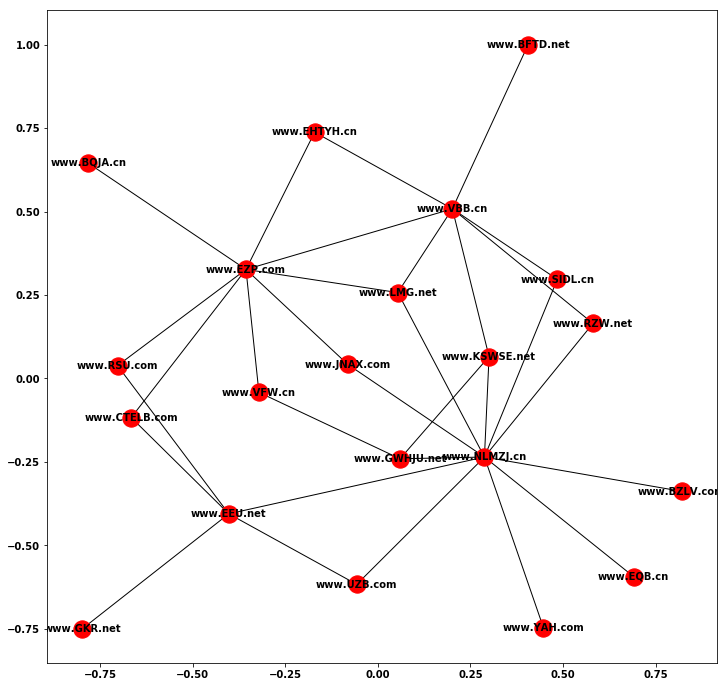

In [280]:
plt.figure(3, figsize=(12,12))
nx.draw_networkx(website_network, font_size=10)

In [282]:
sorted(nx.pagerank(website_network).items(), key=lambda x:x[1], reverse=True)

[('www.NLMZJ.cn', 0.1679566183111041),
 ('www.EZP.com', 0.12038859281686988),
 ('www.VBB.cn', 0.1046015965846712),
 ('www.EEU.net', 0.08092101266575401),
 ('www.GWHJU.net', 0.04740740825287774),
 ('www.KSWSE.net', 0.04625443674265681),
 ('www.LMG.net', 0.04561345284283144),
 ('www.UZB.com', 0.0338774826449054),
 ('www.CTELB.com', 0.03369036392158312),
 ('www.RSU.com', 0.03369036392158312),
 ('www.VFW.cn', 0.033365972841324094),
 ('www.JNAX.com', 0.032912107664821),
 ('www.RZW.net', 0.03282238694351065),
 ('www.SIDL.cn', 0.03282238694351065),
 ('www.EHTYH.cn', 0.032635268220188376),
 ('www.GKR.net', 0.020899298022262335),
 ('www.EQB.cn', 0.020121041765500208),
 ('www.BZLV.com', 0.020121041765500208),
 ('www.YAH.com', 0.020121041765500208),
 ('www.BQJA.cn', 0.019933923042177934),
 ('www.BFTD.net', 0.01984420232086758)]